<a href="https://colab.research.google.com/github/victor-hro/insurance-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Dataframe: Insurance

In [2]:
# criando o dataframe
DATA_DIR = 'data/insurance.csv'
df = pd.read_csv(DATA_DIR)

# visualizando o cabeçalho e printando algumas informações
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])

df.head()

Linhas:  1338
Colunas:  1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Informações sobre cada coluna:

age: idade do beneficiário primário

sex: sexo do contratente do seguro (Homem/Mulher)

bmi: índice de massa corporal, idealmente 18,5 a 24,9

children: número de filhos cobertos pelo seguro saúde / Número de dependentes

smoker: fumante

region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

charges: despesas médicas individuais cobradas pelo seguro saúde

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Removendo dados NaN e duplicatas:


### Arquivos NaN:

In [4]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.isna().sum()
# Apague o comentário e e comece aqui:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicatas:

In [5]:
df.duplicated().sum()

1

In [6]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1338, 7)
(1337, 7)



## Análises estatísticas e visualização de dados

### Distribuição de frequências

podemos classificar nosso conjunto de dados em dois tipos de variáveis: 
* qualitativas: sex, smoker, region
* quantitativas: age, bmi, children, charges

#### Variáveis quantitativas

In [7]:
import plotly.graph_objects as go
import plotly.express as px

# Create a figure with subplots
fig = go.Figure()

columns = ['age', 'bmi', 'charges', 'children']
# Creating individual histograms for each column
for col in columns:
    fig = go.Figure(data=[go.Histogram(x=df[col])])
    fig.update_layout(
        title=f'Histogram of {col}',
        xaxis_title='Value',
        yaxis_title='Count'
    )
    fig.show()

Após visualizar, surge as seguintes hipóteses:
* age: há uma grande quantidade de sujeitos com 20 anos e uma quantidade menor de sujeitos com 40 anos;
* bmi: o valor de bmi pode tender a uma média aproximada de 30;
* charges: a frequência tende a decrescer conforme o aumento do valor;
* children: a frequência tende a decrescer conforme o aumento do número de crianças.

Analisando o gráfico de barras contendo a quantidade de sujeitos por idade.

C:\Users\victo\AppData\Local\Temp\ipykernel_14996\766603272.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




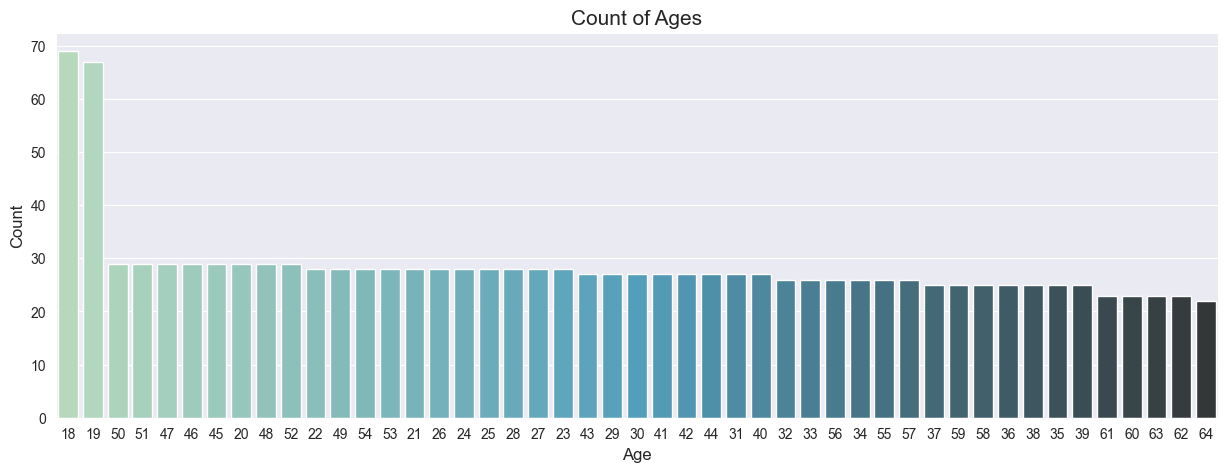

In [8]:
# Creating the plot
plt.figure(figsize=(15, 5))
plot = sns.countplot(data=df, x='age', order=df['age'].value_counts().index, palette='GnBu_d')
plot.set_title('Count of Ages', fontsize=15)
plot.set_xlabel('Age', fontsize=12)
plot.set_ylabel('Count', fontsize=12)

plt.show()



✅ Percebe-se a grande quantidade de pacientes com idade entre 18 a 19 anos, validando a hipótese.

Analisando a moda, mediana e a média da coluna bmi

In [9]:
print('moda: {:.2f}'.format(df.bmi.mode()[0]))
print('mediana: {:.2f}'.format(df.bmi.median()))
print('média: {:.2f}'.format(df.bmi.mean()))
print('O valor predominante é de %.2f e a média é %.2f '% (df.bmi.mode()[0], df.bmi.median()))

moda: 32.30
mediana: 30.40
média: 30.66
O valor predominante é de 32.30 e a média é 30.40 


#### Variáveis qualitativas

In [10]:
figs = []
for col in columns:
    fig = px.histogram(df, x=col, category_orders={col: df[col].value_counts().index},
                       color=col, barmode='group', title=f'Count of {col}',
                       labels={col: col, 'count': 'Count'},
                       width=800, height=400,  # Adjust width and height
                       color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(showlegend=True)  # Show legends
    figs.append(fig)

for fig in figs:
    fig.show()

### Correlação e gráfico de dispersão

In [11]:
df.loc[df['sex'] == 'male', 'sex'] = 0
df.loc[df['sex'] == 'female', 'sex'] = 1

df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0

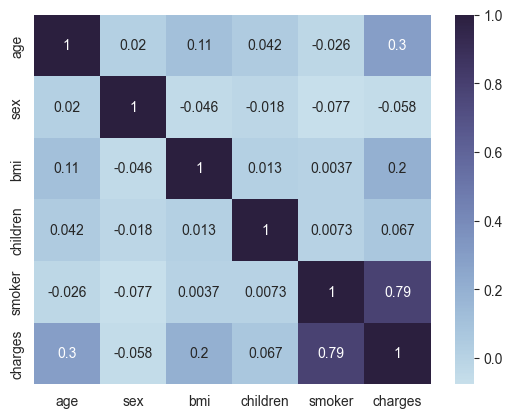

In [12]:
corr = df.drop('region', axis=1).corr()
ax = sns.heatmap(corr,  cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) , annot= True);

Podemos notar que as despesas médicas está mais correlacionada com a idade com o bmi do sujeito. Já o número de crianças apresenta apenas 6% de correlação.

#### custo relacionado a pacientes fumantes e não fumantes

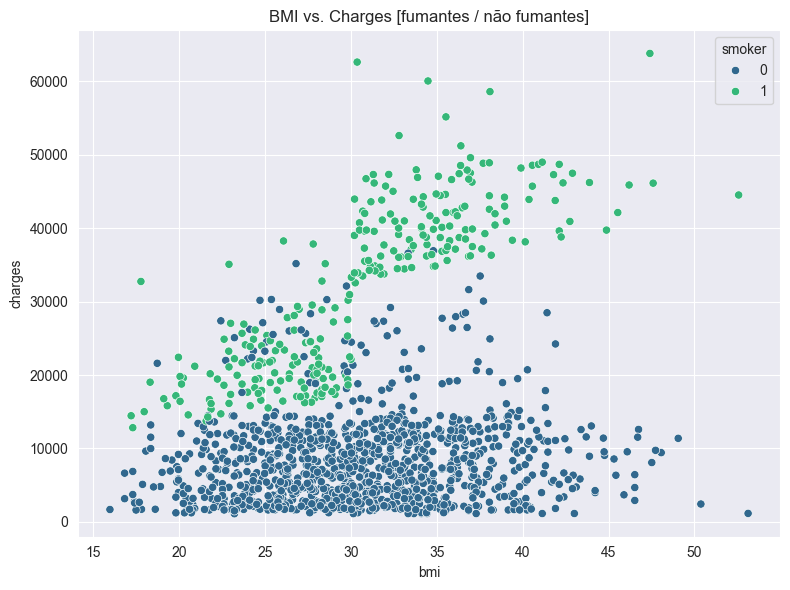

In [13]:
# analisando o gráfico de dispersão para pacientes fumantes e não fumantes, relacionados com os valores de bmi e charges.

# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('BMI vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Pode-se perceber que o valor de charges é maior para pacientes com bmi acima de 30 - que consequentemente é a média do conjunto. O valor se torna maior ainda quando há ocorrência de sujeitos fumantes.

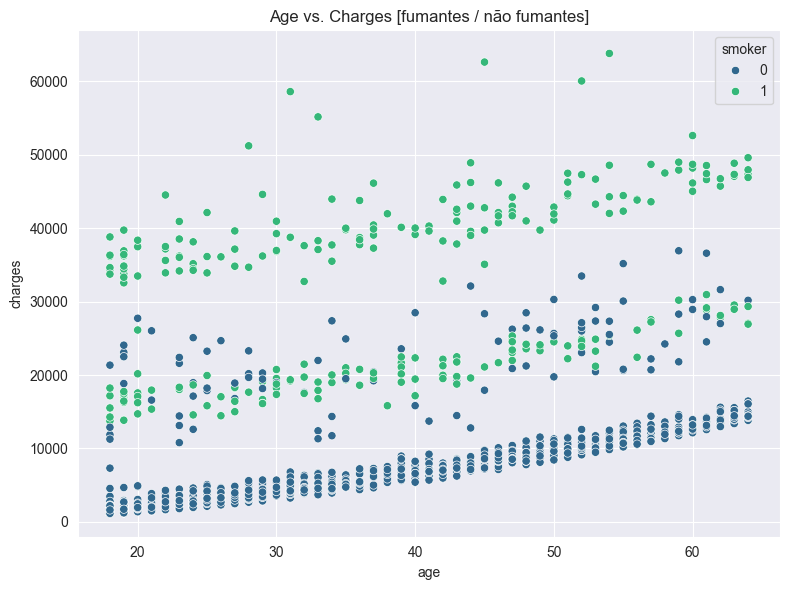

In [14]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('Age vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Pode-se notar que o valor tende a crescer conforme a idade, porém fica ainda maior caso haja pacientes fumantes. 



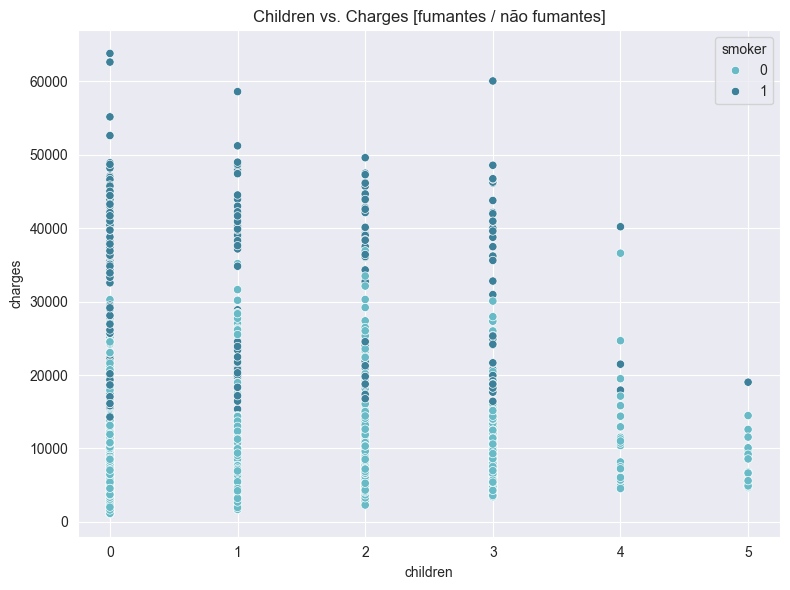

In [15]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='children',
    y='charges',
    palette='GnBu_d',
    hue='smoker'
    );

plt.title('Children vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

✅ Conforme analisamos anteriormente, as despesas estão descorrelacionadas com o número de crianças. Visualmente não tem como definir que o número de crianças está interferindo no valor, apenas podem ser criadas hipóteses do porquê os sujeitos com 4 e 5 crianças contém um menor valor.

### Medidas separatrizes

In [16]:
data_col_smoker = df.groupby('smoker').describe()
data_col_smoker

age                                                         bmi   
         count       mean        std   min   25%   50%   75%   max   count   
smoker                                                                       
0       1063.0  39.404516  14.076133  18.0  27.0  40.0  52.0  64.0  1063.0  \
1        274.0  38.514599  13.923186  18.0  27.0  38.0  49.0  64.0   274.0   

                   ... children      charges                               
             mean  ...      75%  max   count          mean           std   
smoker             ...                                                     
0       30.651853  ...      2.0  5.0  1063.0   8440.660307   5992.973800  \
1       30.708449  ...      2.0  5.0   274.0  32050.231832  11541.547176   

                                                                          
               min           25%          50%           75%          max  
smoker                                                                    
0        1121.8739   3988.883500   7345.72660  11363.019100  36910.60803  
1       12829.4551  20826.244213  34456.34845  41019.207275  63770.42801  

[2 rows x 32 columns]

In [17]:
fig = px.box(df, x='bmi', y='smoker', orientation='h', title='Boxplot of Bmi vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='bmi', yaxis_title='Smoker', showlegend=False)

fig.show()

In [18]:
data_col_smoker['bmi']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1063.0,30.651853,6.045956,15.960,26.31500,30.3050,34.43,53.13
1,274.0,30.708449,6.318644,17.195,26.08375,30.4475,35.20,52.58


✅ Pode haver outliers. É importante um estudo melhor sobre a relação entre bmi e fumantes.

✅ 75% dos sujeitos fumantes e não fumantes coincidentemente estão com bmi acima de 26, mediana aproximadamente a 30 e desvio padrão aproximado de 6.

✅ Alguns sujeitos podem apresentar doenças que impossibilitam de fumar, porém essas informações não foram disponibilizadas no conjunto de dados.

In [19]:
fig = px.box(df, x='age', y='smoker', orientation='h', title='Boxplot of Age vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='Age', yaxis_title='Smoker', showlegend=False)

fig.show()

In [20]:
data_col_smoker['age']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1063.0,39.404516,14.076133,18.0,27.0,40.0,52.0,64.0
1,274.0,38.514599,13.923186,18.0,27.0,38.0,49.0,64.0


In [21]:
df[['age','bmi']].corr()

,age,bmi
age,1.000000,0.109344
bmi,0.109344,1.000000


✅ a mediana é aproximada;

✅ podemos perceber que a metade dos pacientes fumantes está com uma distribuição de idade entre 27 anos a 49.

✅ bmi tem uma correlação de apenas 10% relacionada a idade.

In [22]:
fig = px.box(df, x='charges', y='smoker', orientation='h', title='Boxplot of Charges vs Smoker')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1)))
fig.update_layout(xaxis_title='charges', yaxis_title='Smoker', showlegend=False)

fig.show()

✅ Não podemos considerar como um fator isolado, apenas pelo fato do paciente fumar, pois existem outras doenças que impossibilitam o sujeito de ser fumante, como câncer e leucêma, que consequentemente fazem as despesas aumentarem. Como não temos essas informações, há a possibilidade de considerarmos que o conjunto possui outliers.

✅ Há alguns outliers que merecem estudo posterior.

# Modelo de Machine Learning

## Preparando os dados

In [23]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523


### Convertendo algumas variáveis para dados categoricos

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()

# Convertendo as colunas categóricas para arrays de valores inteiros após o split
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Aplicando o LabelEncoder apenas nos dados de treino
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le.fit(X_train[col])
        X_train[col] = le.transform(X_train[col])
        X_val[col] = le.transform(X_val[col])
        X_test[col] = le.transform(X_test[col])

# Verificando as formas dos conjuntos de dados após a transformação
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(855, 6)
(214, 6)
(268, 6)


## Treinando o modelo

In [25]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# instanciando a função
model = XGBRegressor()

# treinando
model.fit(X_train, y_train)

# from sklearn.metrics import mean_squared_error

score_treinamento = model.score(X_train, y_train)
score_validação = model.score(X_val, y_val)
score_teste = model.score(X_test, y_test)
print('Score do conjunto de treinamento: %.2f ' % score_treinamento)
print('Score do conjunto de validação: %.2f '   % score_validação)
print('Score do conjunto de teste: %.2f '       % score_teste)

Score do conjunto de treinamento: 1.00 
Score do conjunto de validação: 0.81 
Score do conjunto de teste: 0.80 


In [26]:
pred_test = model.predict(X_test)

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=pred_test, mode='markers', 
                         marker=dict(color='red', size=8), name='Valores Previstos'))

fig.add_trace(go.Scatter(x=y_test.sort_values(), y=y_test.sort_values(), mode='lines', 
                         line=dict(color='blue'), name='Valores Reais'))

fig.update_layout(xaxis_title='y_true', yaxis_title='y_pred', title='Erro Residual', width=1000, height=600)

fig.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_14996\1938120189.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




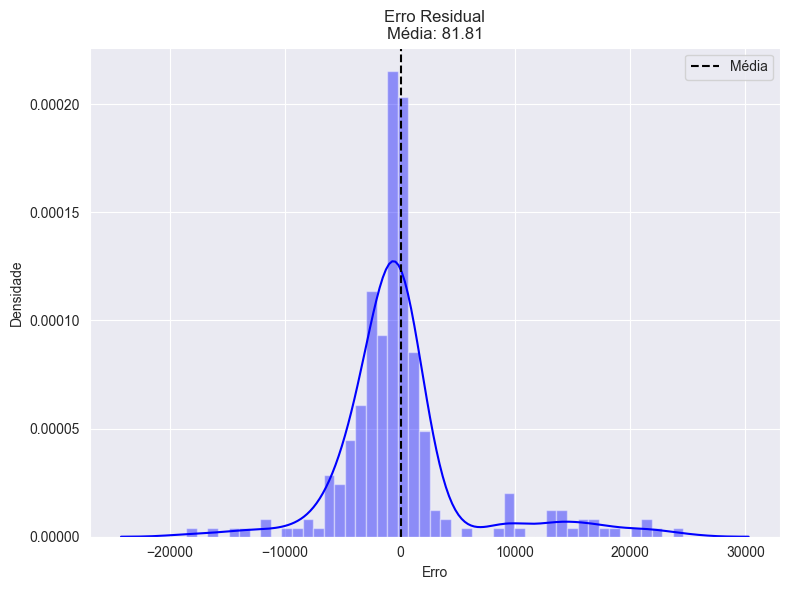

In [28]:
# Plot do erro residual
plt.figure(figsize=(8, 6))

residuals = y_test - pred_test
ax = sns.distplot(residuals, color='b')

ax.set_xlabel('Erro')
ax.set_ylabel('Densidade')
ax.set_title('Erro Residual\nMédia: {:.2f}'.format(np.mean(residuals)))

plt.axvline(np.mean(residuals), color='black', linestyle='--', label='Média')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
standardized_residuals = (y_test - pred_test) / np.std(y_test - pred_test)
mean_residuals = np.mean(standardized_residuals)

fig = go.Figure()

fig.add_trace(go.Scatter(x=pred_test, y=standardized_residuals, mode='markers', 
                         marker=dict(color='green'), name='Resíduos Padronizados'))

fig.add_shape(type='line', x0=min(pred_test), y0=mean_residuals, 
              x1=max(pred_test), y1=mean_residuals,
              line=dict(color='red', width=2, dash='dash'), 
              name='Média dos Resíduos Padronizados')

fig.update_layout(xaxis_title='y_pred', yaxis_title='Resíduos Padronizados', 
                  title='Gráfico de Resíduos Padronizados vs. Valores Previstos')

fig.show()

Por meio deste gráfico podemos valiar padrões nos resíduos, além de verificar onde a variância dos resíduos não é constante em relação às variáveis independentes. Em outras palavras, se a dispersão dos resíduos é ou não uniforme em toda a faixa de valores previstos